## Support Vector Classifier Implementation

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
# Lets create synthetic data points
from sklearn.datasets import make_classification

In [39]:
X , y = make_classification(n_samples=1000 , n_features=2 , n_classes=2 ,n_clusters_per_class=2 ,n_redundant=0)

In [40]:
X

array([[-1.31705487, -1.52277762],
       [-0.98569274, -1.21672501],
       [-0.23015763,  2.01852652],
       ...,
       [ 1.21112055,  0.69742055],
       [ 0.58199017, -1.12346246],
       [ 2.03046949,  1.55388697]])

In [41]:
y

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [42]:
pd.DataFrame(X)[0]

0     -1.317055
1     -0.985693
2     -0.230158
3     -1.120145
4     -0.716697
         ...   
995    1.573649
996   -1.450326
997    1.211121
998    0.581990
999    2.030469
Name: 0, Length: 1000, dtype: float64

In [16]:
pd.DataFrame(X)[1]

0     -1.307320
1      2.333241
2     -0.225311
3      0.779726
4      0.702484
         ...   
995   -0.828349
996    1.108103
997    1.304843
998   -1.680759
999   -1.100173
Name: 1, Length: 1000, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

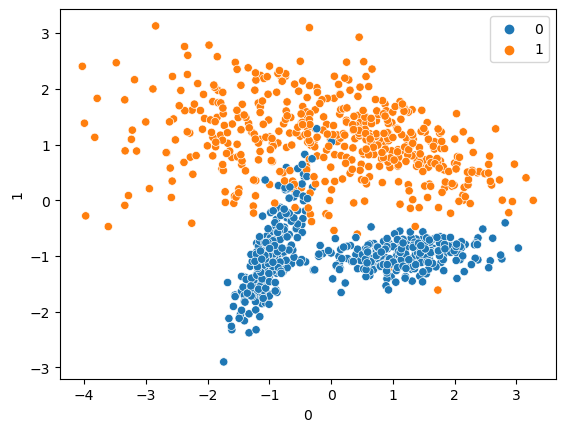

In [44]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1] ,hue=y)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state = 42)

In [47]:
X_train 

array([[-0.42187862,  0.46547582],
       [ 2.96749477,  0.64768365],
       [-3.33562497,  0.88652945],
       ...,
       [-1.64259431,  0.88098875],
       [-0.4020176 ,  0.60779409],
       [ 1.37593618, -0.69565065]])

In [48]:
X_test

array([[-1.1006773 , -1.75914331],
       [ 0.33368485, -1.09738859],
       [-3.14996835,  0.88314882],
       [ 1.30861642,  0.79832666],
       [ 0.64963039,  1.450811  ],
       [ 0.9050344 , -1.30426959],
       [ 0.47888543,  1.27606767],
       [ 0.56543596,  1.08544471],
       [-2.32966897,  1.22819611],
       [ 1.11558047,  1.7710098 ],
       [-0.35679854,  1.07348295],
       [ 2.45590249, -0.51674379],
       [ 1.73884641, -0.13163694],
       [-0.99568555, -0.86538268],
       [ 2.54642832,  0.48845635],
       [-0.681995  , -0.89326371],
       [-0.73986739,  2.22512391],
       [-1.07275608, -0.98921161],
       [ 2.61610392, -0.68137497],
       [-1.38110451,  1.48584796],
       [ 0.40045863, -0.66923303],
       [-2.94276202,  0.20799202],
       [-0.46794037, -0.57699193],
       [ 1.24906503,  0.27845161],
       [-0.60154259, -1.02167393],
       [-1.3363854 ,  1.37827577],
       [ 0.52428996,  0.82890451],
       [ 0.90604063, -0.68637407],
       [ 0.57832485,

In [49]:
from sklearn.svm import SVC

In [50]:
svc = SVC(kernel='linear')

In [51]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [52]:
svc.coef_

array([[0.10025884, 2.28552303]])

In [53]:
#prediction
y_pred = svc.predict(X_test)

In [54]:
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1])

In [55]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [56]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       127
           1       0.93      0.98      0.95       123

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[118   9]
 [  3 120]]
0.952


# Hyperparamter Tuning with SVC 

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = { 'C': [0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']
    
}

In [59]:
grid = GridSearchCV(SVC() , param_grid=param_grid , refit=True , cv=5 , verbose=3)
grid.fit(X_train , y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.960 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.953 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.960 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.907 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.973 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.947 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.940 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.940 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.947 total time=   0.0s
[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.927 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 1/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.800 total time=   0.0s
[CV 2/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.793 total time=   0.0s
[CV 3/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.800 total time=   0.0s
[CV 4/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.773 total time=   0.0s
[CV 5/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.773 total time=   0.0s
[CV 1/5] END .....C=1, gamma

[CV 1/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.767 total time=   0.0s
[CV 2/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.793 total time=   0.0s
[CV 3/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.780 total time=   0.0s
[CV 4/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.720 total time=   0.0s
[CV 5/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.747 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.907 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.960 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.953 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.960 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.907 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.973 total time=   0.0s
[CV 3/5] END ......C=10, gam

[CV 2/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.960 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.953 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.960 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.907 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.973 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.947 total time=   0.0s
[CV 4/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.940 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.940 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 4/5] END ......C=100, ga

[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.953 total time=   0.3s
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.960 total time=   0.3s
[CV 1/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.913 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.967 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.940 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.947 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.927 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END .C=1000, gamma=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [60]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [61]:
#Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       127
           1       0.94      0.98      0.96       123

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[120   7]
 [  3 120]]
0.96
